In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 880 samples, validate on 220 samples
Epoch 1/20
880/880 [==============================] - 31s 35ms/step - loss: 0.7258 - accuracy: 0.5125 - val_loss: 0.6691 - val_accuracy: 0.5364
Epoch 2/20
880/880 [==============================] - 33s 37ms/step - loss: 0.5698 - accuracy: 0.6795 - val_loss: 0.4582 - val_accuracy: 0.8227
Epoch 3/20
880/880 [==============================] - 35s 40ms/step - loss: 0.3743 - accuracy: 0.8500 - val_loss: 0.3689 - val_accuracy: 0.8500
Epoch 4/20
880/880 [==============================] - 36s 41ms/step - loss: 0.2458 - accuracy: 0.9068 - val_loss: 0.3948 - val_accuracy: 0.8227
Epoch 5/20
880/880 [==============================] - 35s 39ms/step - loss: 0.2589 - accuracy: 0.8830 - val_loss: 0.3225 - val_accuracy: 0.8682
Epoch 6/20
880/880 [==============================] - 35s 39ms/step - loss: 0.1534 - accuracy: 0.9466 - val_loss: 0.2853 - val_accuracy: 0.9045
Epoch 7/20
880/880 [==============================] - 34s 39ms/step - loss: 0.1288 - accur

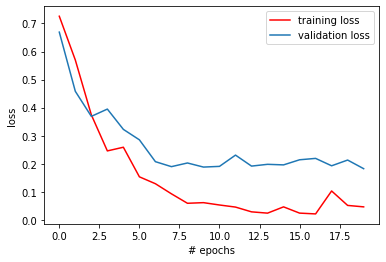

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

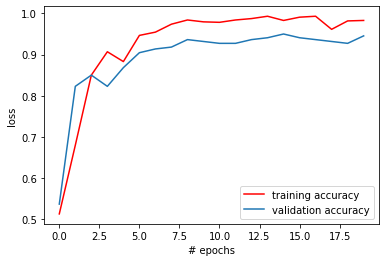

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

276/276 [==============================] - 3s 9ms/step
[0.14977439144707244, 0.9637681245803833]
